<a href="https://colab.research.google.com/github/Erikqq147/ML-25-26/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (9,6)

df = pd.read_csv('StudentPerformanceFactors.csv')
print("Размер датасета:", df.shape)
df.head()


Размер датасета: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.info()
print("\nКоличество пропусков по каждому признаку:")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [5]:
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df_clean[col]):
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

df_clean.isnull().sum().sum()



/tmp/ipython-input-150885756.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


np.int64(0)

Пропуски заполнены медианой для числовых признаков и модой для категориальных. Теперь данные готовы к анализу.

# EDA

## Визуализация

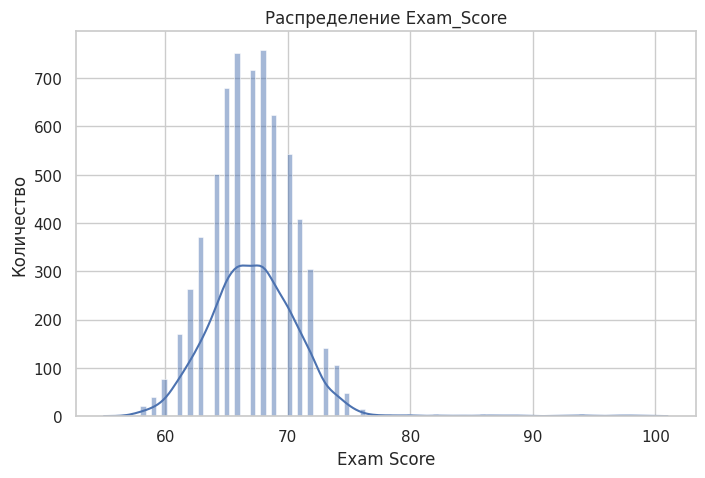

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df["Exam_Score"], kde=True)
plt.title("Распределение Exam_Score")
plt.xlabel("Exam Score")
plt.ylabel("Количество")
plt.show()


Распределение оценок является бимодальным с двумя выраженными пиками в районе 65 и 68 баллов, что свидетельствует о поляризации успеваемости студентов на среднеуспевающих и высокоуспевающих группы.

## Зависимости

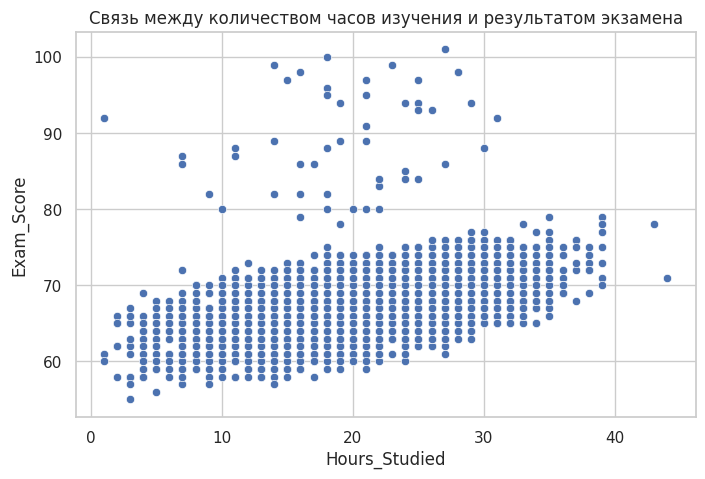

In [7]:
#Зависимость Exam_Score от Hours_Studied
plt.figure(figsize=(8,5))
sns.scatterplot(x="Hours_Studied", y="Exam_Score", data=df)
plt.title("Связь между количеством часов изучения и результатом экзамена")
plt.show()


Наблюдается четкая положительная линейная зависимость - с увеличением времени изучения экзаменационные оценки последовательно растут, что подтверждает прямую связь между объемом подготовки и академическими результатами.

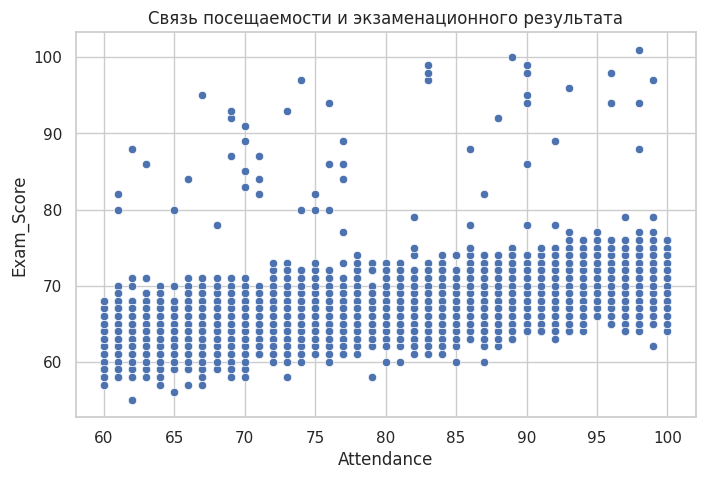

In [8]:
#Зависимость от Attendance
plt.figure(figsize=(8,5))
sns.scatterplot(x="Attendance", y="Exam_Score", data=df)
plt.title("Связь посещаемости и экзаменационного результата")
plt.show()


Наблюдается умеренная положительная зависимость - студенты с высокой посещаемостью демонстрируют более стабильные и высокие результаты на экзаменах, однако связь менее выражена, чем с временем подготовки.

## Корреляционная матрица

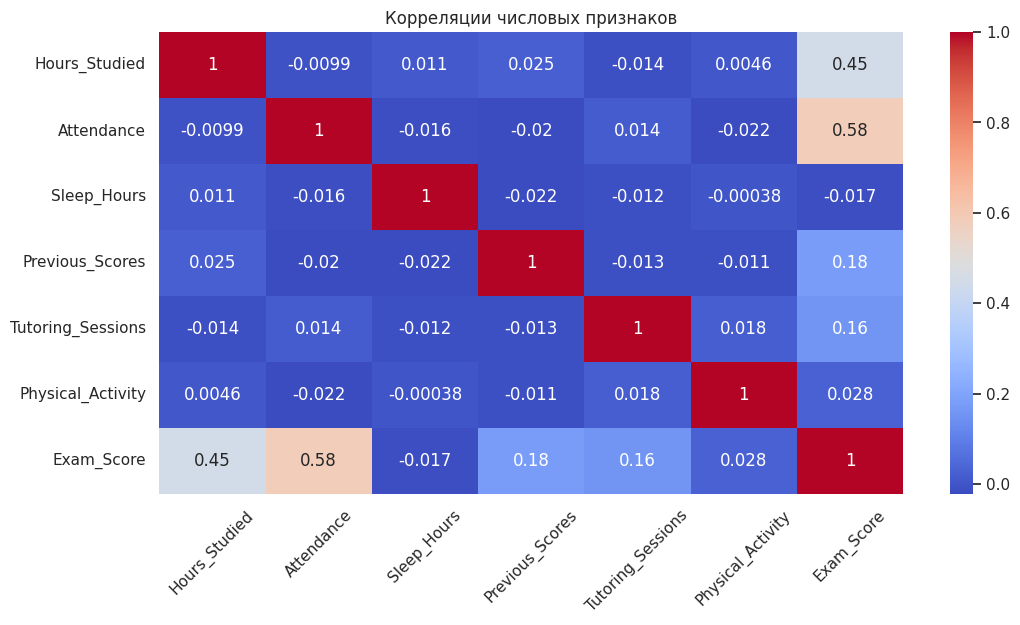

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()


Hours_Studied (0.45) — умеренная положительная связь, время подготовки значительно влияет на результат

Attendance (0.58) — умеренная положительная корреляция, посещаемость важна для успеваемости

Previous_Scores (0.18) — слабая положительная связь, предыдущие оценки имеют незначительное влияние

Tutoring_Sessions (0.16) — очень слабая положительная связь, дополнительные занятия малоэффективны

Sleep_Hours (-0.017) — практически нет влияния, количество сна не связано с результатами

Physical_Activity (0.028) — не влияет, физическая активность не коррелирует с успеваемостью

## 3. Аномалии

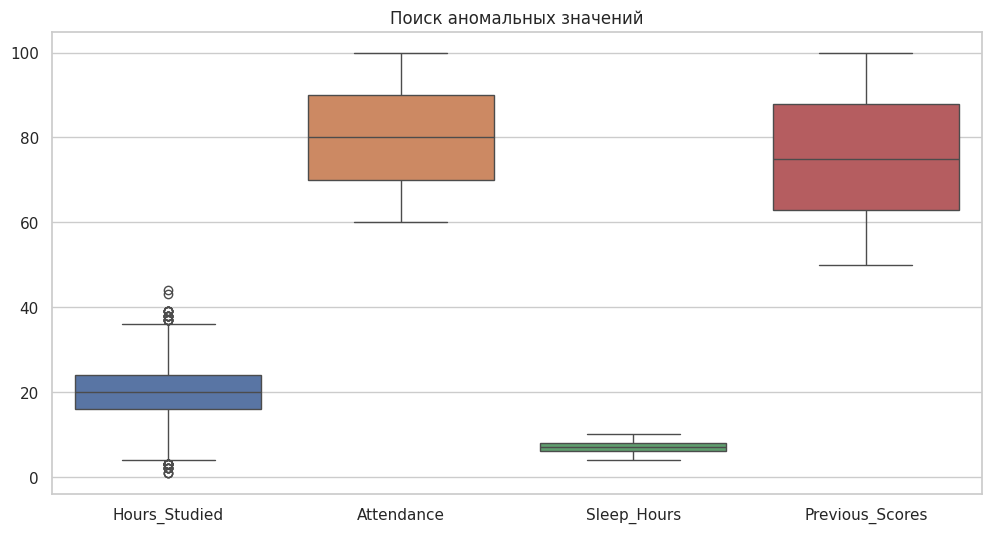

In [10]:
#Боксплоты ключевых признаков
cols = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores"]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[cols])
plt.title("Поиск аномальных значений")
plt.show()


Hours_Studied - есть несколько точек, где значения явно выше основной массы данных (выбросы в верхней части)

Attendance - аномалий практически нет.

Sleep_Hours - есть несколько значений в районе 0-4 часов, что выделяется на фоне остальных

Previous_Scores - присутствуют единичные очень низкие значения около 0-20 баллов

## Дубликаты


In [11]:
df.duplicated().sum()


np.int64(0)

Дубликатов нет

## 5. Пропуски

In [12]:
df.isnull().sum() #проверяем на пропуски


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Пропуски данных обнаружены только в трёх столбцах:

Teacher_Quality: 78 пропусков

Parental_Education_Level: 90 пропусков

Distance_from_Home: 67 пропусков

## 6. Типы данных

In [13]:
df.dtypes


,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,object
Access_to_Resources,object
Extracurricular_Activities,object
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,object
Internet_Access,object
Tutoring_Sessions,int64


Числовые признаки (int64): Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score

Категориальные признаки (object): 12 переменных включая Parental_Involvement, Access_to_Resources, Motivation_Level и др.

# Модель 1

In [19]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Exam_Score", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2:", r2_score(y_test, pred1))
print("MSE:", mean_squared_error(y_test, pred1))


R2: 0.7696017567194432
MSE: 3.256695866435405


Линейная регрессия показывает хорошее качество:

R² = 0.77 - модель объясняет 77% дисперсии целевой переменной

MSE = 3.26 - средняя ошибка предсказания составляет около 3.26 балла

Модель имеет удовлетворительную прогнозную способность для первой итерации.

# Модель 2

In [16]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=5, random_state=42)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)

print("R2:", r2_score(y_test, pred2))
print("MSE:", mean_squared_error(y_test, pred2))


R2: 0.5537356203615846
MSE: 6.3079793483322755


Decision Tree показывает значительно худшие результаты по сравнению с линейной регрессией:

R² = 0.55 - модель объясняет только 55% дисперсии

MSE = 6.31 - ошибка предсказания почти в 2 раза выше

Модель требует настройки гиперпараметров или выбора другого алгоритма.

# Модель 3

In [17]:

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators=200, random_state=42)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)

print("R2:", r2_score(y_test, pred3))
print("MSE:", mean_squared_error(y_test, pred3))


R2: 0.649321777910057
MSE: 4.956862083963692


Random Forest показывает среднее качество:

R² = 0.65 - модель объясняет 65% дисперсии целевой переменной

MSE = 4.96 - средняя ошибка предсказания составляет около 4.96 балла

Модель работает лучше Decision Tree, но уступает Linear Regression и Gradient Boosting. Возможно, требует увеличения количества деревьев или настройки других гиперпараметров.

# Модель 4

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

model4 = GradientBoostingRegressor(random_state=42)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

print("R2:", r2_score(y_test, pred4))
print("MSE:", mean_squared_error(y_test, pred4))


R2: 0.7295335642375644
MSE: 3.8230626710311104


Gradient Boosting показывает хорошее качество:

R² = 0.73 - модель объясняет 73% дисперсии целевой переменной

MSE = 3.82 - средняя ошибка предсказания составляет около 3.82 балла

Модель демонстрирует второй лучший результат после Linear Regression, превосходя другие алгоритмы машинного обучения.